In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = pd.read_excel("c:/Users/ANJAN/OneDrive/Documents/Anjan Datasets/data-export (1) C.xlsx")
data.head()

,Session primary channel group (Default channel group),Date + hour (YYYYMMDDHH),Users,Sessions,Engaged sessions,Average engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [4]:
# data.columns = data.loc[0]
# data.head()                #to change and set the first row as header

In [4]:
data = data.rename(columns={'Session primary channel group (Default channel group)': 'Channel Group',
                            'Date + hour (YYYYMMDDHH)': 'Date_Hour',
                            'Users': 'Users',
                            'Sessions': 'Sessions',
                            'Engaged sessions': 'Engaged sessions',
                            'Average engagement time per session': 'Avg. engagement time per session',
                            'Engaged sessions per user': 'Engaged sessions per user',
                            'Events per session': 'Events per session',
                            'Engagement rate': 'Engagement rate',
                            'Event count': 'Event count'})
data.head()  #to rename columns for better readability

,Channel Group,Date_Hour,Users,Sessions,Engaged sessions,Avg. engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count
0,Direct,2024041623,237,300,144,47.526667,0.607595,4.673333,0.480000,1402
1,Organic Social,2024041719,208,267,132,32.097378,0.634615,4.295880,0.494382,1147
2,Direct,2024041723,188,233,115,39.939914,0.611702,4.587983,0.493562,1069
3,Organic Social,2024041718,187,256,125,32.160156,0.668449,4.078125,0.488281,1044
4,Organic Social,2024041720,175,221,112,46.918552,0.640000,4.529412,0.506787,1001


In [5]:
#data.columns = ['Channel Group', 'Date_Hour', 'Users', 'Sessions', 'Engaged sessions', 'Average engagement time per session', 
                # 'Engaged sessions per user', 'Events per session', 'Engagement rate', 'Event count']

In [6]:
data['Date_Hour'] = pd.to_datetime(data['Date_Hour'], format = '%Y%m%d%H', errors= 'coerce')
numeric_cols = data.columns.drop(['Channel Group', 'Date_Hour'])
data[numeric_cols] = data[numeric_cols].apply(pd.to_numeric, errors= 'coerce')
data['Hour'] = data['Date_Hour'].dt.hour
data.head()

,Channel Group,Date_Hour,Users,Sessions,Engaged sessions,Avg. engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
0,Direct,2024-04-16 23:00:00,237,300,144,47.526667,0.607595,4.673333,0.480000,1402,23
1,Organic Social,2024-04-17 19:00:00,208,267,132,32.097378,0.634615,4.295880,0.494382,1147,19
2,Direct,2024-04-17 23:00:00,188,233,115,39.939914,0.611702,4.587983,0.493562,1069,23
3,Organic Social,2024-04-17 18:00:00,187,256,125,32.160156,0.668449,4.078125,0.488281,1044,18
4,Organic Social,2024-04-17 20:00:00,175,221,112,46.918552,0.640000,4.529412,0.506787,1001,20


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 11 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Channel Group                     3182 non-null   object        
 1   Date_Hour                         3182 non-null   datetime64[ns]
 2   Users                             3182 non-null   int64         
 3   Sessions                          3182 non-null   int64         
 4   Engaged sessions                  3182 non-null   int64         
 5   Avg. engagement time per session  3182 non-null   float64       
 6   Engaged sessions per user         3182 non-null   float64       
 7   Events per session                3182 non-null   float64       
 8   Engagement rate                   3182 non-null   float64       
 9   Event count                       3182 non-null   int64         
 10  Hour                              3182 non-null 

In [8]:
sample_reviews = data.iloc[[1, 2, 3, 5, 8]]
print(sample_reviews)

    Channel Group           Date_Hour  Users  Sessions  Engaged sessions  \
1  Organic Social 2024-04-17 19:00:00    208       267               132   
2          Direct 2024-04-17 23:00:00    188       233               115   
3  Organic Social 2024-04-17 18:00:00    187       256               125   
5  Organic Social 2024-04-17 21:00:00    160       206               103   
8  Organic Social 2024-04-13 21:00:00    152       178                96   

   Avg. engagement time per session  Engaged sessions per user  \
1                         32.097378                   0.634615   
2                         39.939914                   0.611702   
3                         32.160156                   0.668449   
5                         59.315534                   0.643750   
8                         30.488764                   0.631579   

   Events per session  Engagement rate  Event count  Hour  
1            4.295880         0.494382         1147    19  
2            4.587983     

In [9]:
first_description = data.Sessions.loc[0]

print(first_description)

300


In [10]:
data.isnull().any().any()   # to check if there are any missing values in the data

np.False_

In [11]:
print(data.shape)  #to check the total number of rows and columns
data.columns #to check the column names

(3182, 11)


Index(['Channel Group', 'Date_Hour', 'Users', 'Sessions', 'Engaged sessions',
       'Avg. engagement time per session', 'Engaged sessions per user',
       'Events per session', 'Engagement rate', 'Event count', 'Hour'],
      dtype='object')

In [12]:
data.describe() #to get a statistical summary of the numeric columns 

,Date_Hour,Users,Sessions,Engaged sessions,Avg. engagement time per session,Engaged sessions per user,Events per session,Engagement rate,Event count,Hour
count,3182,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000,3182.000000
mean,2024-04-20 01:17:07.278441216,41.935889,51.192646,28.325581,66.644581,0.606450,4.675969,0.503396,242.272470,11.807040
min,2024-04-06 00:00:00,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,2024-04-13 02:15:00,20.000000,24.000000,13.000000,32.103034,0.561404,3.750000,0.442902,103.000000,6.000000
50%,2024-04-20 02:00:00,42.000000,51.000000,27.000000,49.020202,0.666667,4.410256,0.545455,226.000000,12.000000
75%,2024-04-26 22:00:00,60.000000,71.000000,41.000000,71.487069,0.750000,5.217690,0.633333,339.000000,18.000000
max,2024-05-03 23:00:00,237.000000,300.000000,144.000000,4525.000000,2.000000,56.000000,1.000000,1402.000000,23.000000
std,NaN,29.582258,36.919962,20.650569,127.200659,0.264023,2.795228,0.228206,184.440313,6.886686


 ---
# Visualize missing values

<Axes: >

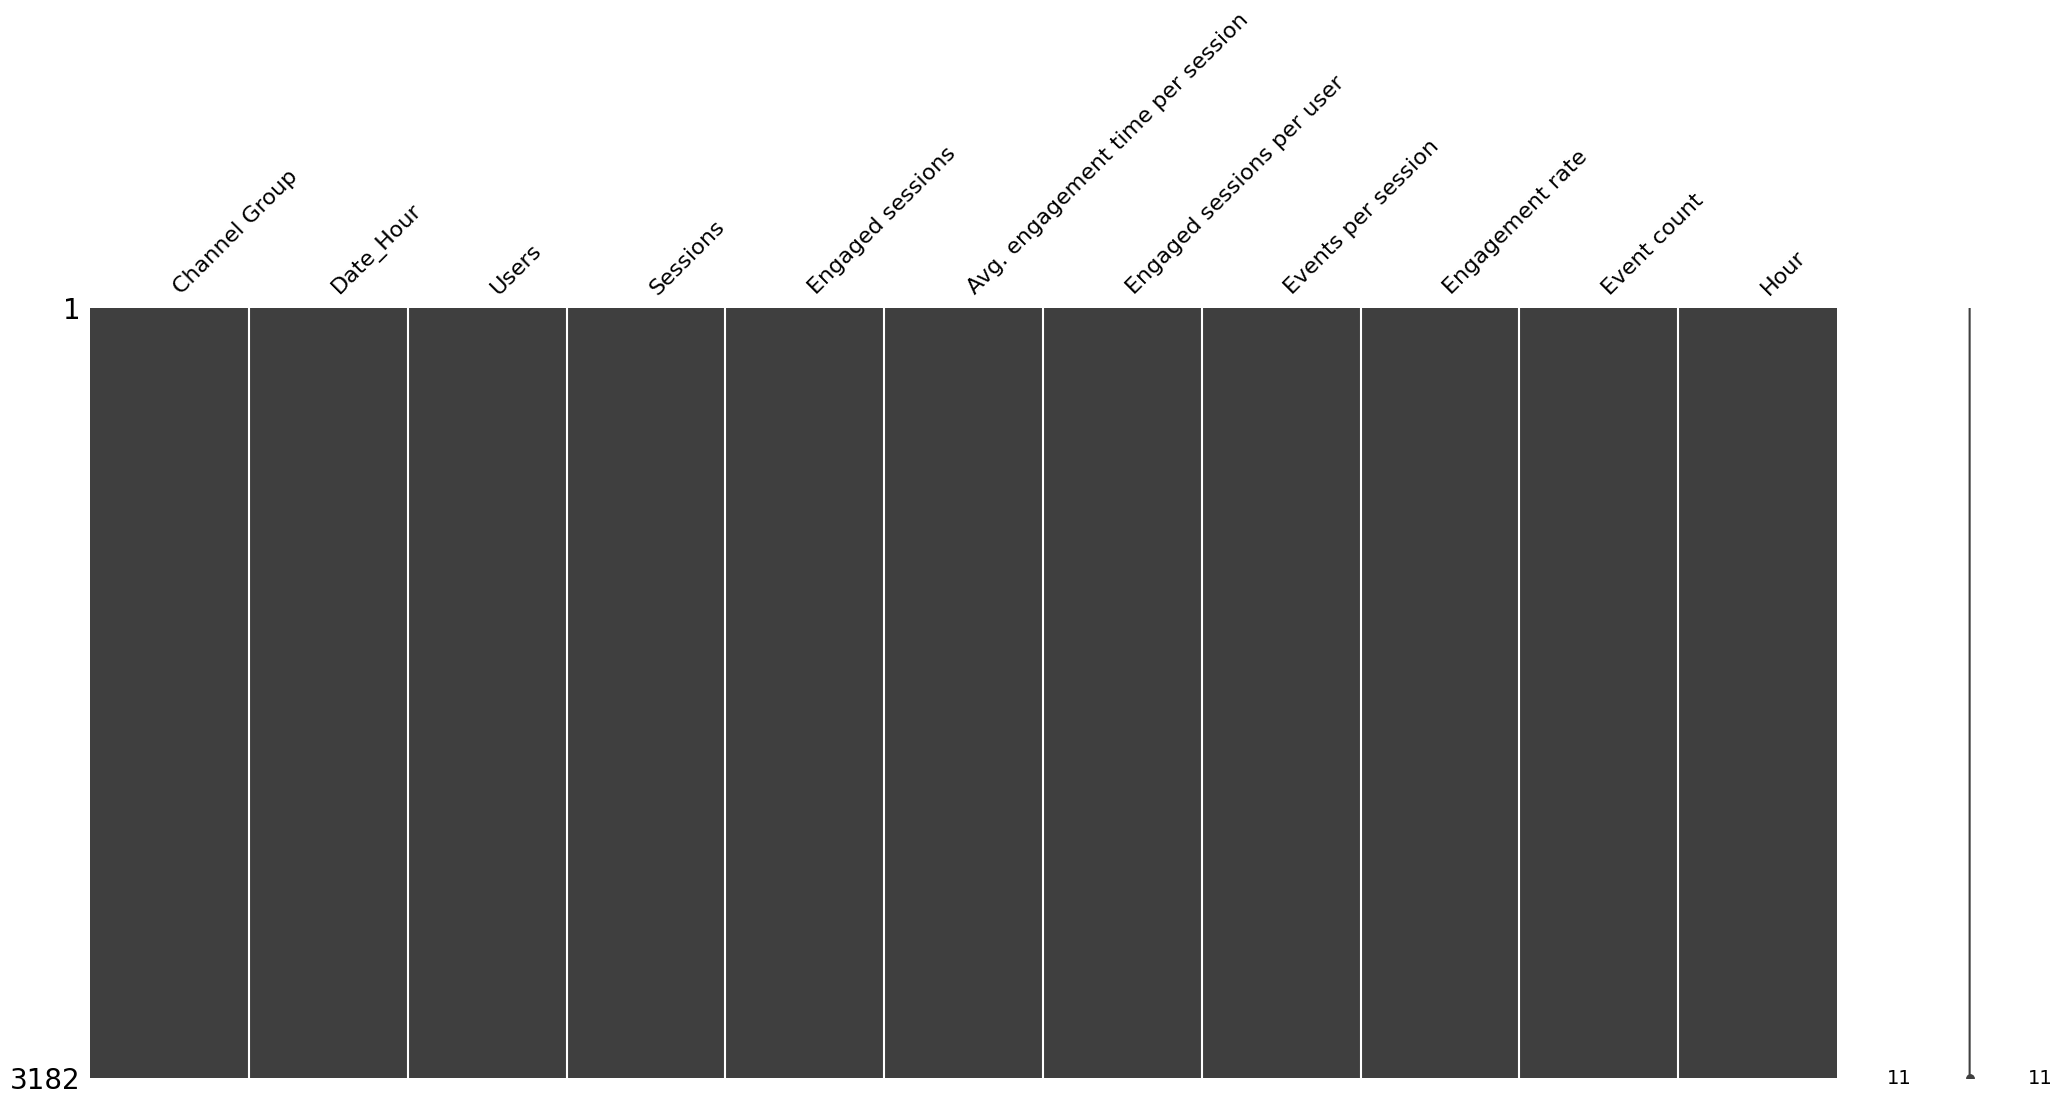

In [13]:
import missingno as msno
msno.matrix(data)      #to visualize missing values in the dataset

 ---
**Sessions and User Overtime**

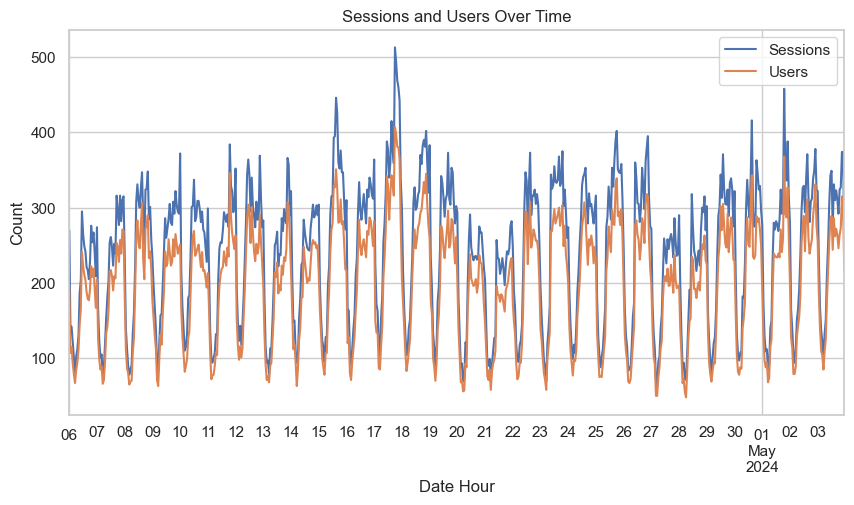

In [14]:
sns.set(style= 'whitegrid')
plt.figure(figsize=(10, 5))
data.groupby('Date_Hour')[['Sessions', 'Users']].sum().plot(ax=plt.gca())
#.sum().plot(ax=plt.gca() is used to plot the sum of sessions and users overtime
plt.title('Sessions and Users Over Time') 
plt.xlabel('Date Hour')
plt.ylabel('Count')
plt.show()         #to visualize the trend of Sessions and Users over time

In [16]:
plt.savefig("images/sessions_users Over Time.png")


<Figure size 640x480 with 0 Axes>

 ---
**Total Users by Channels**

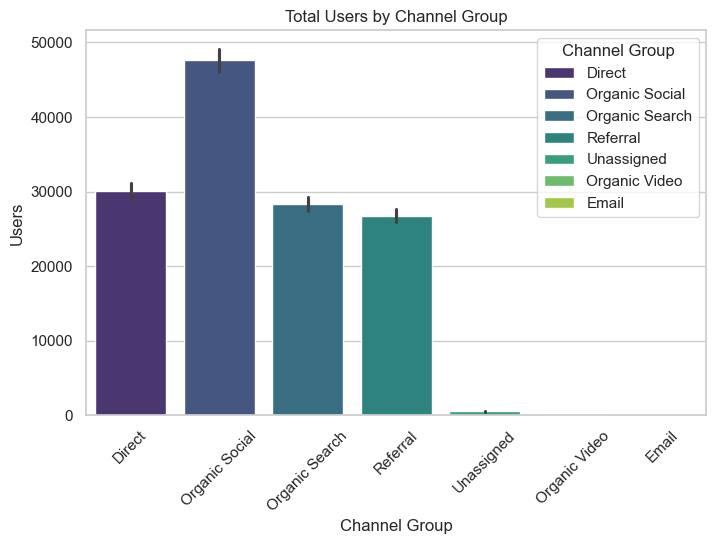

In [16]:
plt.figure(figsize=(8, 5))
sns.barplot(data= data, x='Channel Group', y='Users', estimator=np.sum, palette='viridis', hue='Channel Group', legend=True)
#estimator=np.sum is used to sum the users for each channel group
plt.title('Total Users by Channel Group') 
plt.xticks(rotation=45)
plt.show()       #to visualize the total number of Users by Channel Group

 ---
**Average Engagement time by Channel**

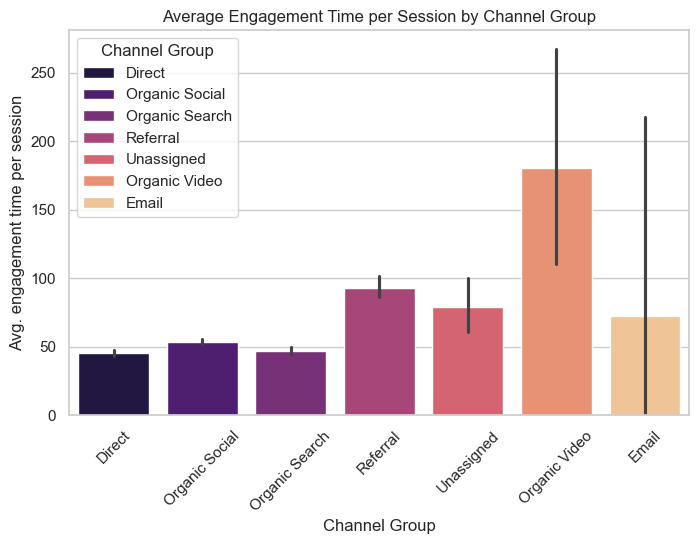

In [17]:
plt.figure(figsize=(8, 5))
sns.barplot(data=data, x='Channel Group', y='Avg. engagement time per session', 
            estimator=np.mean, palette='magma', hue='Channel Group', legend=True)
# used np.mean because we want the average time spent on the site by Channel Group
plt.xticks(rotation=45)
plt.title('Average Engagement Time per Session by Channel Group')  
plt.show() #to visualize the average engagement time per session by Channel Group

 ---
**Engagement Rate Distribution by channel**

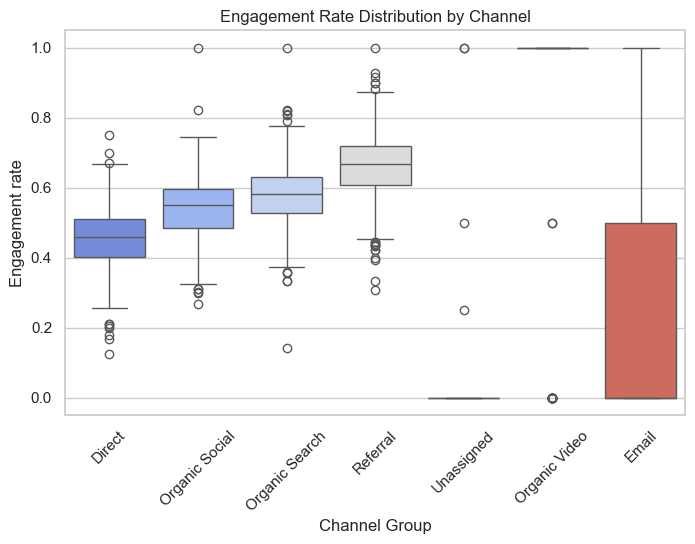

In [18]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=data, x="Channel Group", y="Engagement rate", palette="coolwarm", hue="Channel Group")
plt.title("Engagement Rate Distribution by Channel")
plt.xticks(rotation=45)
plt.show()  #to understand the distribution of Engagement rate across different Channel Groups 

 ---
**Engaged vs Non Engaged Sessions**

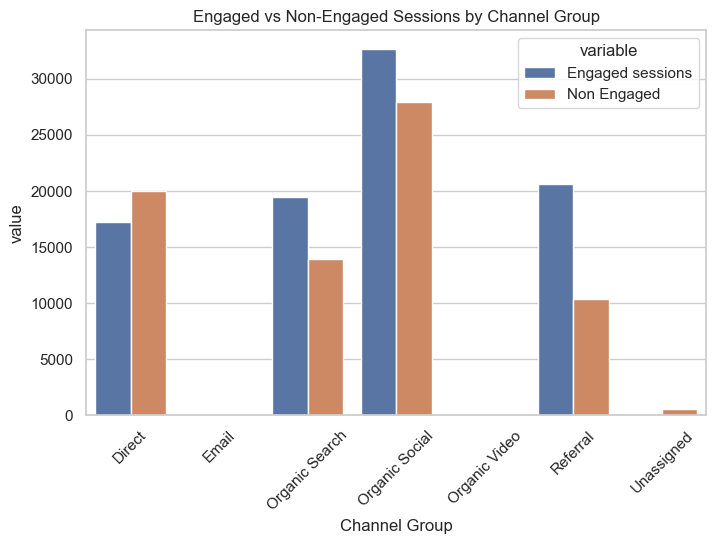

In [19]:
session_data = data.groupby('Channel Group')[['Sessions', 'Engaged sessions']].sum().reset_index()
session_data['Non Engaged'] = session_data['Sessions'] - session_data['Engaged sessions']
session_data_melted = session_data.melt(id_vars='Channel Group', value_vars=['Engaged sessions', 'Non Engaged'])
#session_data.melt method is used for reshaping the DataFrame from wide format to Long format, 
# which is suitable for plotting with seaborn 
plt.figure(figsize=(8, 5))
sns.barplot(data=session_data_melted, x='Channel Group', y='value', hue='variable')
plt.title('Engaged vs Non-Engaged Sessions by Channel Group')
plt.xticks(rotation=45)
plt.show() #to understand the distribution of Engaged vs Non-Engaged Sessions by Channel Group

 ---
**Traffic by Hour and Channel**

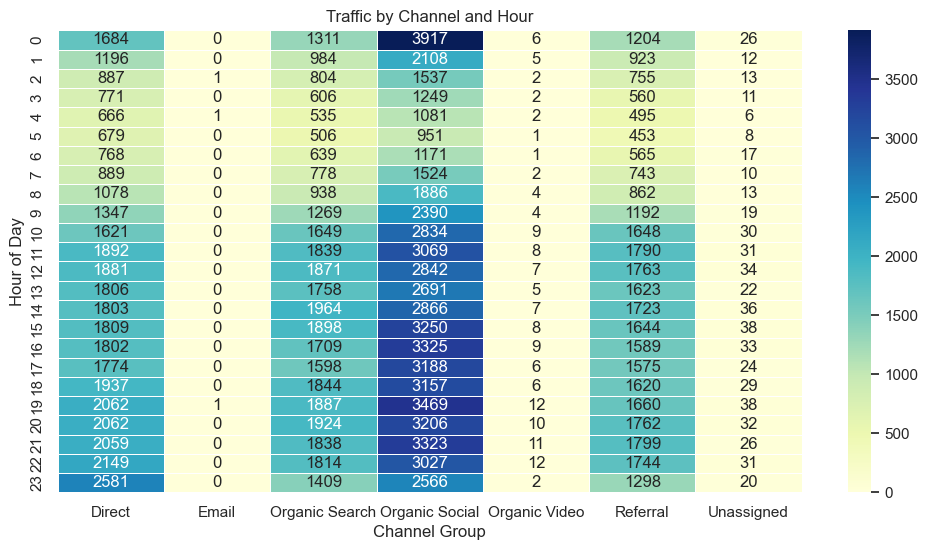

In [20]:
traffic_data = data.groupby(['Hour', 'Channel Group'])['Sessions'].sum().unstack().fillna(0)
# the unstack() method is used to pivot the Channel Group into columns, 
# and fillna(0) is used to replace NaN values with 0 for better visualization          
plt.figure(figsize=(12, 6))
sns.heatmap(traffic_data, cmap='YlGnBu', annot=True, fmt='.0f', linewidths=.5)
plt.title('Traffic by Channel and Hour')
plt.xlabel('Channel Group')
plt.ylabel('Hour of Day')
plt.show()

 ---
**Engagement rate vs Sessions over time**

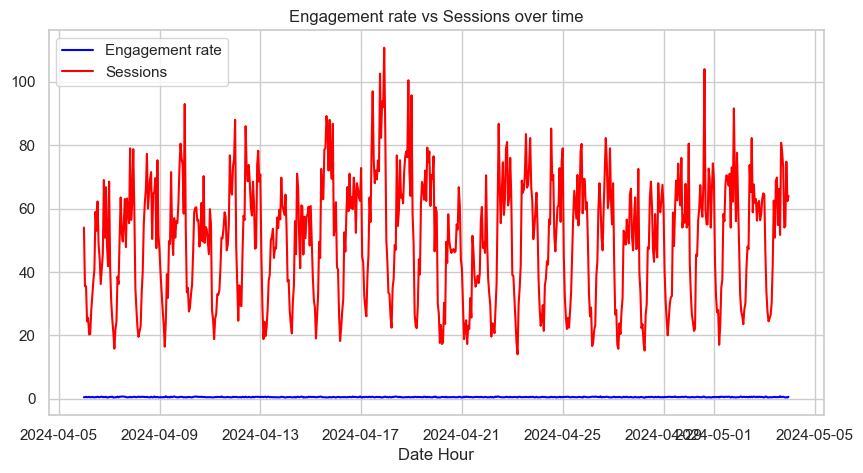

In [21]:
data_plot = data.groupby('Date_Hour')[['Engagement rate', 'Sessions']].mean().reset_index()
plt.figure(figsize=(10, 5))
plt.plot(data_plot['Date_Hour'], data_plot['Engagement rate'], label= 'Engagement rate', color='blue')
plt.plot(data_plot['Date_Hour'], data_plot['Sessions'], label= 'Sessions', color='red')
plt.title('Engagement rate vs Sessions over time')
plt.xlabel('Date Hour')
plt.legend()
plt.grid(True)
plt.show()  #to understand the relationship between Engagement rate and Sessions over time

 ---